In [1]:
import pandas as pd
import torch

In [2]:
# Import train and test set
train = pd.read_csv('titanic-dataset/train.csv')
test = pd.read_csv('titanic-dataset/test.csv')

In [3]:
# Get target values
y = train['Survived']

# Drop the Survived column and remove it from further calculations
train.drop(columns=['Survived'], inplace=True)

### Train-test-split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

### NaN values

In [5]:
# Check for NaN values
X_train.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          462
Embarked         1
dtype: int64

In [6]:
# Use mode() function to get the most frequent value
modes = X_train.mode().iloc[0]
modes

PassengerId                              1
Pclass                                 3.0
Name           Abbott, Mr. Rossmore Edward
Sex                                   male
Age                                   24.0
SibSp                                  0.0
Parch                                  0.0
Ticket                            CA. 2343
Fare                                  8.05
Cabin                          C23 C25 C27
Embarked                                 S
Name: 0, dtype: object

In [7]:
# Use fillna with most frequent values
X_train.fillna(modes, inplace=True)

In [8]:
# Check for NaN values
X_train.isna().sum().sum()

0

Get rid of 'Name', 'Ticket' abd 'Cabin' variables
**NOTE**: We don't use those values because right now it is out of scope. However, information in those variables are crucial and very imortant! The best score in Kaggle on Titanic dataset is performed only on 'Name' variable! See this notebook for more information: https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818/notebook
**NOTE**: It's very common in tabular data to use *categorical embeddings*. This is on *TODO* list right after finishing this notebook.

In [9]:
X_train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

### Label encoding

In [10]:
# Explore which variables are categorical
X_train.reset_index(inplace=True)
X_train

,index,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,6,7,1,male,54.0,0,0,51.8625,S
1,718,719,3,male,24.0,0,0,15.5000,Q
2,685,686,2,male,25.0,1,2,41.5792,C
3,73,74,3,male,26.0,1,0,14.4542,C
4,882,883,3,female,22.0,0,0,10.5167,S
...,...,...,...,...,...,...,...,...,...
591,106,107,3,female,21.0,0,0,7.6500,S
592,270,271,1,male,24.0,0,0,31.0000,S
593,860,861,3,male,41.0,2,0,14.1083,S
594,435,436,1,female,14.0,1,2,120.0000,S


In [11]:
# Categorical varaibles are Pclass, Sex, Embarked - use one-hot encoding for gender and label for embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

In [12]:
# Use one_hot_encode for gender
gender = one_hot_encoder.fit_transform(X_train[['Sex']])
gender_df = pd.DataFrame(gender.toarray(), columns=['Male', 'Female'])

In [13]:
#Merge train with encoded gender
X_train = pd.concat([X_train, gender_df], axis=1)

# Drop unused column
X_train.drop(columns=['Sex'], inplace=True)

# Encode 'Embarked' with label encoder
X_train['Embarked'] = label_encoder.fit_transform(X_train['Embarked'])

# Set PassangerID as index
X_train.set_index('PassengerId', inplace=True)

# Print
X_train

,index,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female
PassengerId,,,,,,,,,
7,6,1,54.0,0,0,51.8625,2,0.0,1.0
719,718,3,24.0,0,0,15.5000,1,0.0,1.0
686,685,2,25.0,1,2,41.5792,0,0.0,1.0
74,73,3,26.0,1,0,14.4542,0,0.0,1.0
883,882,3,22.0,0,0,10.5167,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...
107,106,3,21.0,0,0,7.6500,2,1.0,0.0
271,270,1,24.0,0,0,31.0000,2,0.0,1.0
861,860,3,41.0,2,0,14.1083,2,0.0,1.0


### Use the same preprocessing techniques for test set

In [14]:
# Use fillna with most frequent values
X_test.fillna(modes, inplace=True)

In [15]:
X_test.reset_index(inplace=True)

X_test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [16]:
# Use one_hot_encode for gender
gender_test = one_hot_encoder.transform(X_test[['Sex']])
gender_test_df = pd.DataFrame(gender_test.toarray(), columns=['Male', 'Female'])
gender_test_df

,Male,Female
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
290,0.0,1.0
291,0.0,1.0
292,1.0,0.0
293,1.0,0.0


In [17]:
# Merge train with encoded gender
X_test = pd.concat([X_test, gender_test_df], axis=1)

# Drop unused column
X_test.drop(columns=['Sex'], inplace=True)

# Encode 'Embarked' with label encoder
X_test['Embarked'] = label_encoder.transform(X_test['Embarked'])

# Set PassangerID as index
X_test.set_index('PassengerId', inplace=True)

# Print
X_test

,index,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female
PassengerId,,,,,,,,,
710,709,3,24.0,1,1,15.2458,0,0.0,1.0
440,439,2,31.0,0,0,10.5000,2,0.0,1.0
841,840,3,20.0,0,0,7.9250,2,0.0,1.0
721,720,2,6.0,0,1,33.0000,2,1.0,0.0
40,39,3,14.0,1,0,11.2417,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
716,715,3,19.0,0,0,7.6500,2,0.0,1.0
526,525,3,40.5,0,0,7.7500,1,0.0,1.0
382,381,3,1.0,0,2,15.7417,0,1.0,0.0


In [18]:
# Check whether the dimensions are correct
display(X_train.shape)
display(X_test.shape)

(596, 9)

(295, 9)

## Model

In [19]:
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [20]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [21]:
n_features = X_train.shape[1]

# Define the class
class TitanicNetwork(nn.Module):
    def __init__(self):
        super(TitanicNetwork, self).__init__()

        # Number of input features is 9
        self.layer_in = nn.Linear(n_features, 63)
        self.layer_2 = nn.Linear(63, 63)
        self.layer_out = nn.Linear(63,1)

        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(63)
        self.batchnorm2 = nn.BatchNorm1d(63)

    def forward(self, inputs):
        x = self.relu(self.layer_in(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        # x = self.dropout(x)
        x = self.layer_out(x)

        return x

titanic_network = TitanicNetwork()

**Note**: that we did not use the Sigmoid activation in our final layer during training. That’s because, we use the nn.BCEWithLogitsLoss() loss function which automatically applies the Sigmoid activation.

In [22]:
# Initialize the model
model = TitanicNetwork()

# Specify the device type responsible to load model into memory
model.to(device)

TitanicNetwork(
  (layer_in): Linear(in_features=9, out_features=63, bias=True)
  (layer_2): Linear(in_features=63, out_features=63, bias=True)
  (layer_out): Linear(in_features=63, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(63, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(63, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [23]:
print(model)

TitanicNetwork(
  (layer_in): Linear(in_features=9, out_features=63, bias=True)
  (layer_2): Linear(in_features=63, out_features=63, bias=True)
  (layer_out): Linear(in_features=63, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(63, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(63, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [24]:
print(list(model.named_parameters()))

[('layer_in.weight', Parameter containing:
tensor([[ 0.3149,  0.3225,  0.1048,  0.1402, -0.1547,  0.2990,  0.1759, -0.2710,
          0.1837],
        [-0.0430,  0.0582, -0.0792, -0.1982, -0.0911,  0.0667,  0.0610, -0.3275,
          0.2646],
        [ 0.0150, -0.3212, -0.0837, -0.2736,  0.2628,  0.1239,  0.1070, -0.0892,
         -0.0775],
        [-0.0640, -0.0627,  0.2997,  0.1098,  0.2188,  0.2504,  0.3061,  0.2043,
         -0.2799],
        [ 0.2547,  0.0823, -0.1310, -0.2252,  0.1768, -0.1600,  0.3177,  0.0401,
          0.2061],
        [ 0.0566, -0.0782,  0.1118, -0.2420, -0.2112,  0.1888,  0.3252,  0.1570,
         -0.3275],
        [-0.1603, -0.3269,  0.0875,  0.2066,  0.1232,  0.2884, -0.2769, -0.0752,
         -0.0972],
        [-0.2885,  0.3002, -0.2712, -0.2857,  0.2059, -0.0213,  0.0794,  0.2497,
          0.0320],
        [ 0.2230,  0.2243, -0.1672, -0.0751,  0.2994, -0.3090, -0.2275,  0.0205,
          0.1739],
        [ 0.2108, -0.2632, -0.1621, -0.1430,  0.3134,  0.

In [25]:
# Init loss function (Binary Cross Entropy Loss) (we assume that target is equally distributed)
loss_function = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

### DataLoaders and Dataset

Before training, we should implement custom Dataset class

In [26]:
class TitanicTrainDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        """ Return the single observation, including both independent and dependent variable """
        # Convert idx from tensor to list due to pandas bug (that arises when using pytorch's random_split)
        # if isinstance(index, torch.Tensor):
        #     index = index.tolist()

        return self.X_data[index], self.y_data[index]
        # return [self.X_data.iloc[index].values, self.y_data[index]]

    def __len__(self):
        """ Return the number of rows from tabular data """
        return len(self.X_data)

In [27]:
class TitanicTestDataset(Dataset):

    def __init__(self, X_data):
        self.X_data = X_data

    def __getitem__(self, index):
        """ Return the single observation, including only independent variable """
        if isinstance(index, torch.Tensor):
            index = index.tolist()

        return self.X_data[index]

    def __len__(self):
        """ Return the number of rows from tabular data """
        return len(self.X_data)

In [28]:
train_data = TitanicTrainDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
test_data = TitanicTestDataset(torch.Tensor(X_test.values))

In [29]:
# Test len method
train_data.__len__()

596

In [30]:
train.__len__()

891

In [31]:
y_train.value_counts()

0    374
1    222
Name: Survived, dtype: int64

In [32]:
# Test getitem method
train_data.__getitem__(1)

(tensor([718.0000,   3.0000,  24.0000,   0.0000,   0.0000,  15.5000,   1.0000,
           0.0000,   1.0000]),
 tensor(0.))

In [33]:
# Initialize dataloaders
BATCH_SIZE_TRAIN = 64
BATCH_SIZE_TEST = 1
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE_TEST, shuffle=False)

### Train

In [34]:
# Define binary accuracy function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)

    return acc

In [35]:
EPOCHS = 50

loss_list = []
validate_loss_list = []

# Prepare model for training (default state)
model.train()

for e in range(1, EPOCHS+1):

    # Init loss and acc per epoch to zero
    epoch_loss = 0
    epoch_acc = 0

    # For loop to get our data in batches from dataloader
    for X_batch, y_batch in train_dataloader:

        # Load batches into memory (device)
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Set .grad attribute of all tensors to zero (otherwise we would accumulate it with .backwards())
        optimizer.zero_grad()

        # Forward pass (use input data to make prediction)
        y_pred = model(X_batch)

        # Calculate loss based on prediction and true value
        loss = loss_function(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))

        loss_list.append(loss.item())

        # We backpropagate this error through the network
        # The gradient is calculated for tensors which requires_grad=True
        loss.backward()

        # Adjust each parameter (weight and bias) by its gradient stored in .grad
        optimizer.step()

        # Calculate loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_dataloader):.5f} | Acc: {epoch_acc/len(train_dataloader):.3f}')

Epoch 001: | Loss: 0.68453 | Acc: 58.500
Epoch 002: | Loss: 0.64285 | Acc: 68.100
Epoch 003: | Loss: 0.63653 | Acc: 66.100
Epoch 004: | Loss: 0.61881 | Acc: 67.200
Epoch 005: | Loss: 0.61967 | Acc: 66.400
Epoch 006: | Loss: 0.61609 | Acc: 67.400
Epoch 007: | Loss: 0.60910 | Acc: 69.300
Epoch 008: | Loss: 0.60248 | Acc: 67.900
Epoch 009: | Loss: 0.59427 | Acc: 69.100
Epoch 010: | Loss: 0.56999 | Acc: 70.300
Epoch 011: | Loss: 0.57939 | Acc: 69.400
Epoch 012: | Loss: 0.58389 | Acc: 67.700
Epoch 013: | Loss: 0.57689 | Acc: 68.700
Epoch 014: | Loss: 0.56028 | Acc: 70.400
Epoch 015: | Loss: 0.53900 | Acc: 73.400
Epoch 016: | Loss: 0.56514 | Acc: 71.800
Epoch 017: | Loss: 0.56583 | Acc: 69.500
Epoch 018: | Loss: 0.56597 | Acc: 69.900
Epoch 019: | Loss: 0.55360 | Acc: 71.100
Epoch 020: | Loss: 0.51691 | Acc: 73.500
Epoch 021: | Loss: 0.52666 | Acc: 73.000
Epoch 022: | Loss: 0.50901 | Acc: 74.300
Epoch 023: | Loss: 0.50681 | Acc: 74.000
Epoch 024: | Loss: 0.50944 | Acc: 76.900
Epoch 025: | Los

Text(0, 0.5, 'BCE Loss')

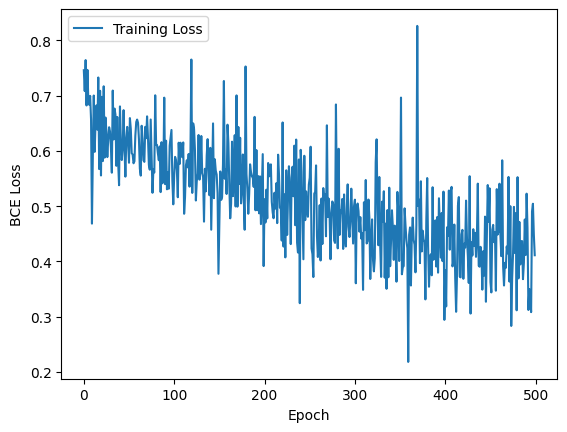

In [36]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
# plt.plot(validate_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

### Test

In [37]:
y_pred_list = []

# Prepare model for testing
model.eval()

# We don't want to perform backpropagation
with torch.no_grad():

    # Go through batches
    for X_batch in test_dataloader:

        # Load batch into memory
        X_batch = X_batch.to(device)

        # Get the result
        y_test_pred = model(X_batch)

        y_test_pred = torch.sigmoid(y_test_pred)

        # Round probabilities to 0 or 1
        y_pred_tag = torch.round(y_test_pred)

        # Convert tensor to numpy object
        y_pred_list.append(y_pred_tag.cpu().numpy())

# Flatten the list to use confusion matrix and classification report
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot confusion matrix
confusion_matrix(y_test, y_pred_list)

array([[150,  25],
       [ 31,  89]])

In [39]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       175
           1       0.78      0.74      0.76       120

    accuracy                           0.81       295
   macro avg       0.80      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



### Submit

### Preprocessing

In [40]:
# Use fillna with most frequent values
test.fillna(modes, inplace=True)
test.reset_index(inplace=True)

test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Use one_hot_encode for gender
gender_test = one_hot_encoder.transform(test[['Sex']])
gender_test_df = pd.DataFrame(gender_test.toarray(), columns=['Male', 'Female'])

# Merge train with encoded gender
test = pd.concat([test, gender_test_df], axis=1)

# Drop unused column
test.drop(columns=['Sex'], inplace=True)

# Encode 'Embarked' with label encoder
test['Embarked'] = label_encoder.transform(test['Embarked'])

# Set PassangerID as index
test.set_index('PassengerId', inplace=True)

# Print
test

,index,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female
PassengerId,,,,,,,,,
892,0,3,34.5,0,0,7.8292,1,0.0,1.0
893,1,3,47.0,1,0,7.0000,2,1.0,0.0
894,2,2,62.0,0,0,9.6875,1,0.0,1.0
895,3,3,27.0,0,0,8.6625,2,0.0,1.0
896,4,3,22.0,1,1,12.2875,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1305,413,3,24.0,0,0,8.0500,2,0.0,1.0
1306,414,1,39.0,0,0,108.9000,0,1.0,0.0
1307,415,3,38.5,0,0,7.2500,2,0.0,1.0


### Predict

In [41]:
# Apply model on test data
sub_X = torch.tensor(test.values)

# Get the results
sub_y = titanic_network(sub_X.float())

# Get survived
survived = torch.heaviside(sub_y, values=torch.tensor([0.0]))

In [42]:
test.reset_index(inplace=True)

In [43]:
test['Survived'] = survived.detach().numpy().astype(int)
sub_df = test[['PassengerId', 'Survived']]
sub_df.to_csv('submission/sub-pytorch.csv', index=False)

In [44]:
!head 'submission/sub-fastai.csv'

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
